In [1]:
import os
import requests, json
import matplotlib.pyplot as plt

download files

In [2]:
experiment_list_name = 'file_list_tfchip_hg38_bednarrowpeak.txt'
#os.system('xargs -L 1 curl -O -J -L < ' + experiment_list_name)

In [3]:
experiment_list_temp = open(experiment_list_name).readlines()[1:]
experiment_list = []
for experiment_i in experiment_list_temp:
    experiment_list.append(experiment_i.split('files/')[1].split('/@@')[0])
    
print(experiment_list[0:5])

['ENCFF888ORB', 'ENCFF460GXA', 'ENCFF643AUL', 'ENCFF616GPO', 'ENCFF104VFF']


In [ ]:
experiment_summary = {}
headers = {'accept': 'application/json'}
for experiment_i in experiment_list:
    print(experiment_i)
    url = 'https://www.encodeproject.org/search/?searchTerm=' + experiment_i + '&frame=object'
    response = requests.get(url, headers=headers)
    experiment_summary[experiment_i] = {}
    for i in range(len(response.json()['@graph'])):
        if('biosample_summary' in response.json()['@graph'][i].keys()):
            experiment_summary[experiment_i]['biobiosample_summary'] = response.json()['@graph'][i]['biosample_summary']
    if('assay_title' in response.json()['@graph'][0]):
        experiment_summary[experiment_i]['assay_title'] = response.json()['@graph'][0]['assay_title']
    if('assembly' in response.json()['@graph'][0]):
        experiment_summary[experiment_i]['assembly'] = response.json()['@graph'][0]['assembly']


In [5]:
cellline_list = []
sequencing_method_list = []
assembly_list = []
for experiment_i in experiment_list[0:5]:
    if('biobiosample_summary' in list(experiment_summary[experiment_i].keys())):
        cellline_list.append(experiment_summary[experiment_i]['biobiosample_summary'])
    if('assay_title' in list(experiment_summary[experiment_i].keys())):
        sequencing_method_list.append(experiment_summary[experiment_i]['assay_title'])
    if('assembly' in list(experiment_summary[experiment_i].keys())):
        assembly_list.append(experiment_summary[experiment_i]['assembly'])

In [6]:
for experiment_i in experiment_list[0:5]:
    print(experiment_summary[experiment_i])

{'biobiosample_summary': 'A549 treated with 100 nM dexamethasone for 2 hours', 'assay_title': 'TF ChIP-seq', 'assembly': 'GRCh38'}
{'biobiosample_summary': 'K562', 'assay_title': 'TF ChIP-seq', 'assembly': 'GRCh38'}
{'biobiosample_summary': 'K562 genetically modified (insertion) using CRISPR targeting human ZNF639', 'assay_title': 'TF ChIP-seq', 'assembly': 'GRCh38'}
{'biobiosample_summary': 'lower leg skin tissue female adult (53 years)', 'assay_title': 'TF ChIP-seq', 'assembly': 'GRCh38'}
{'biobiosample_summary': 'K562', 'assay_title': 'TF ChIP-seq', 'assembly': 'GRCh38'}


In [ ]:
unique_cellline_list = np.unique(cellline_list)
unique_sequencing_method_list = np.unique(sequencing_method_list)

In [ ]:
data_availability_summary = np.zeros((len(unique_cellline_list), len(unique_sequencing_method_list)))
for experiment_i in experiment_list[0:1010]:
    if(('biobiosample_summary' in list(experiment_summary[experiment_i].keys())) & ('assay_title' in list(experiment_summary[experiment_i].keys())) & ('assembly' in list(experiment_summary[experiment_i].keys()))):
        data_availability_summary[np.where(experiment_summary[experiment_i]['biobiosample_summary'] == unique_cellline_list)[0][0], np.where(experiment_summary[experiment_i]['assay_title'] == unique_sequencing_method_list)[0][0]] = data_availability_summary[np.where(experiment_summary[experiment_i]['biobiosample_summary'] == unique_cellline_list)[0][0], np.where(experiment_summary[experiment_i]['assay_title'] == unique_sequencing_method_list)[0][0]] + 1

In [65]:
print(unique_sequencing_method_list)

array(['Control ChIP-seq', 'DNase-seq', 'Hi-C', 'Histone ChIP-seq',
       'Mint-ChIP-seq', 'RAMPAGE', 'TF ChIP-seq', 'WGBS', 'eCLIP',
       'polyA plus RNA-seq', 'shRNA RNA-seq', 'siRNA RNA-seq',
       'small RNA-seq', 'total RNA-seq'], dtype='<U18')

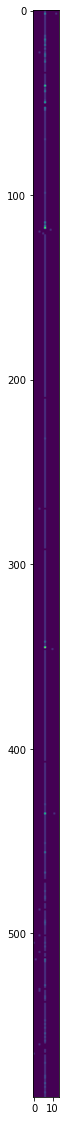

In [61]:
fig, ax = plt.subplots(figsize=(100, 20))
ax.imshow(np.log(data_availability_summary + 1))